## Step 4: Data Visualization

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
import holoviews as hv
import geoviews as gv

c:\Users\neilc\.conda\envs\dev1\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Import API key
from config import geoapify_key
geoapify_key

'61af9cc886364e8cb0382e25ca72cc9f'

In [4]:
# Reading CSV file for chargers

csv_file_path = '../Project_1/output_data/chargers_output.csv'
chargers_df = pd.read_csv(csv_file_path)
chargers_df

,name,near,Address,Lat,Lng,Charging Speed
0,Electrify America Charging Station,"Bothell, WA, USA","14003 NE Woodinville Duvall Rd, Woodinville, W...",47.754139,-122.151152,Very fast
1,bp pulse Charging Station,"Bothell, WA, USA","13023 NE 175th St, Woodinville, WA 98072",47.754105,-122.166144,Very fast
2,Tesla Supercharger,"Bothell, WA, USA","19128 112th Ave NE, Bothell, WA 98011",47.767526,-122.191578,Fast
3,ChargePoint Charging Station,"Bothell, WA, USA","18231 110th Ave NE, Bothell, WA 98011",47.759647,-122.193886,Slow
4,EVgo Charging Station,"Bothell, WA, USA","3000 196th St SW, Lynnwood, WA 98036",47.820570,-122.273570,Fast
...,...,...,...,...,...,...
410,Blink Charging Station,"Seattle, WA, USA","1530 Belmont Ave, Seattle, WA 98122",47.614840,-122.324167,Slow
411,Blink Charging Station,"Seattle, WA, USA","Union Station, 505 5th Ave S, Seattle, WA 98104",47.597516,-122.327673,Slow
412,Loop Charging Station,"Seattle, WA, USA",US,47.617690,-122.330590,Slow
413,Blink Charging Station,"Seattle, WA, USA","1220 Howell St, Seattle, WA 98101",47.617493,-122.330225,Not Applicable


In [5]:
# Extracting charger data for Bellevue, WA 
city_bellevue = chargers_df[(chargers_df['near'] == 'Bellevue, WA, USA')]
city_bellevue

,name,near,Address,Lat,Lng,Charging Speed
257,EVgo Charging Station,"Bellevue, WA, USA","888 116th Ave NE, Bellevue, WA 98004",47.618936,-122.184163,Super fast
258,Electrify America Charging Station,"Bellevue, WA, USA","300 Bellevue Way NE, Bellevue, WA 98004",47.613019,-122.200470,Very fast
259,ChargePoint Charging Station,"Bellevue, WA, USA","600 Bellevue Square, Bellevue, WA 98004",47.615796,-122.205579,Slow
260,Tesla Supercharger,"Bellevue, WA, USA","10333 NE 1st St, Bellevue, WA 98004",47.611048,-122.202181,Fast
261,EVgo Charging Station,"Bellevue, WA, USA","2041 148th Ave NE, Bellevue, WA 98007",47.628025,-122.143753,Super fast
...,...,...,...,...,...,...
337,Blink Charging Station,"Bellevue, WA, USA","13035 SE 26th St, Bellevue, WA 98005",47.587216,-122.165142,Medium
338,Fast Charging Station,"Bellevue, WA, USA","Bellefield Building, 1309 114th Ave SE, Bellev...",47.598937,-122.189179,Not Applicable
339,Shell Recharge Charging Station,"Bellevue, WA, USA","12903 NE 20th St, Bellevue, WA 98005",47.627697,-122.167891,Not Applicable
340,Volta Charging Station,"Bellevue, WA, USA","Bellevue, WA 98006",47.578662,-122.170444,Slow


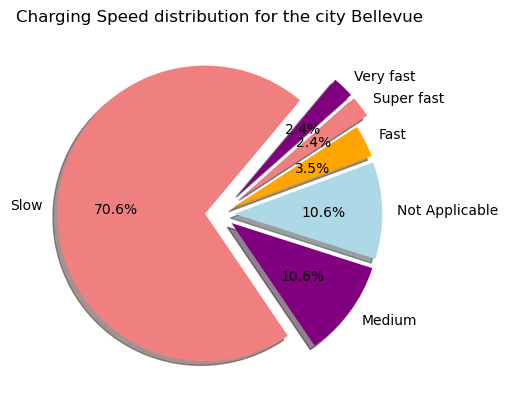

In [6]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Super Fast', 'Very Fast', 'Fast', 'Medium', 'Slow', 'Not Applicable']
}
explode = (0.1,0.1,0.1,0.1,0.2,0.2)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = city_bellevue['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['lightcoral', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed distribution for the city Bellevue')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Bellevue_Charging_Speed_Distribution.png")
plt.show()

In [7]:
# Plot Bellevue chargers

map_plot_1 = city_bellevue.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    hover = ["Address"],
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Bellevue",
    hover_cols = "all"
)

# Display the map plot

map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [8]:
# Extracting charger data for Bothell, WA 

city_bothell = chargers_df[(chargers_df['near'] == 'Bothell, WA, USA')]
city_bothell

,name,near,Address,Lat,Lng,Charging Speed
0,Electrify America Charging Station,"Bothell, WA, USA","14003 NE Woodinville Duvall Rd, Woodinville, W...",47.754139,-122.151152,Very fast
1,bp pulse Charging Station,"Bothell, WA, USA","13023 NE 175th St, Woodinville, WA 98072",47.754105,-122.166144,Very fast
2,Tesla Supercharger,"Bothell, WA, USA","19128 112th Ave NE, Bothell, WA 98011",47.767526,-122.191578,Fast
3,ChargePoint Charging Station,"Bothell, WA, USA","18231 110th Ave NE, Bothell, WA 98011",47.759647,-122.193886,Slow
4,EVgo Charging Station,"Bothell, WA, USA","3000 196th St SW, Lynnwood, WA 98036",47.820570,-122.273570,Fast
...,...,...,...,...,...,...
83,Blink Charging Station,"Bothell, WA, USA","3611 NE 155th St, Lake Forest Park, WA 98155",47.740732,-122.290141,Slow
84,Pacific Electric Vehicle Technologies,"Bothell, WA, USA","2201 192nd St SE, Bothell, WA 98012",47.826360,-122.203304,Not Applicable
85,Volta Charging Station,"Bothell, WA, USA","Lynnwood, WA 98037",47.831176,-122.273708,Not Applicable
86,Tesla Supercharger,"Bothell, WA, USA","Fred Meyer, 12221 120th Ave NE, Kirkland, WA 9...",47.709207,-122.183452,Very fast


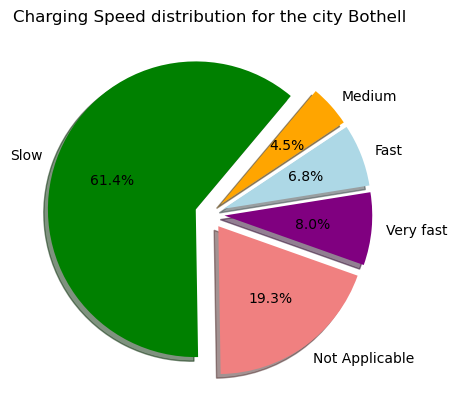

In [9]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Very Fast', 'Fast', 'Medium', 'Slow', 'Not Applicable']
}
explode = (0.1,0.1,0.1,0.1,0.1)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = city_bothell['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['green','lightcoral', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed distribution for the city Bothell')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Bothell_Charging_Speed_Distribution.png")
plt.show()

In [10]:
# Plot Bothell chargers
map_plot_2 = city_bothell.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Bothell",
    hover_cols = "all"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [11]:
# Extracting charger data for Vancouver, WA 

city_vancouver = chargers_df[(chargers_df['near'] == 'Vancouver, WA, USA')]
city_vancouver

,name,near,Address,Lat,Lng,Charging Speed
88,ChargePoint Charging Station,"Vancouver, WA, USA","850 Officers Row, Vancouver, WA 98661",45.629460,-122.663366,Fast
89,Electrify America Charging Station,"Vancouver, WA, USA","7809 NE Vancouver Plaza Dr, Vancouver, WA 98663",45.649943,-122.593315,Very fast
90,Electric Vehicle Charging Station,"Vancouver, WA, USA","4715 N Lagoon Ave, Portland, OR 97217",45.557316,-122.702974,Very fast
91,Blink Charging Station,"Vancouver, WA, USA","1300 Franklin St, Vancouver, WA 98660",45.632357,-122.678211,Slow
92,EVgo Charging Station,"Vancouver, WA, USA","2170 NW Raleigh St, Portland, OR 97210",45.533890,-122.695460,Fast
...,...,...,...,...,...,...
165,EV Connect Charging Station,"Vancouver, WA, USA","11714 NE 72nd Ave, Vancouver, WA 98686",45.706634,-122.600012,Not Applicable
166,OpConnect Charging Station,"Vancouver, WA, USA","62723 NE Killingsworth St, Portland, OR 97218",45.565390,-122.592841,Slow
167,OpConnect Charging Station,"Vancouver, WA, USA","4145 NE Cully Blvd, Portland, OR 97218",45.553085,-122.603334,Slow
168,Electric Era Charging Station,"Vancouver, WA, USA","6060 NE Columbia Blvd, Portland, OR 97218",45.568333,-122.599814,Very fast


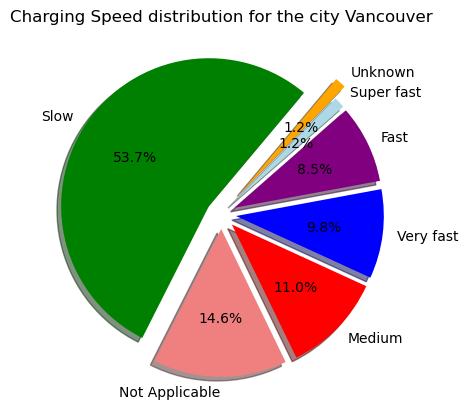

In [12]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Super Fast', 'Very Fast', 'Fast', 'Medium', 'Slow', 'unknown', 'Not Applicable']
}
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.2)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = city_vancouver['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['green','lightcoral', 'red', 'blue', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed distribution for the city Vancouver')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Vancouver_Charging_Speed_Distribution.png")
plt.show()

In [13]:
# Plot Vancouver chargers
map_plot_3 = city_vancouver.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Vancouver",
    hover_cols = "all"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [14]:
# Extracting charger data for Redmond, WA 

city_redmond = chargers_df[(chargers_df['near'] == 'Redmond, WA, USA')]
city_redmond

,name,near,Address,Lat,Lng,Charging Speed
170,EVgo Charging Station,"Redmond, WA, USA","7525 166th Ave NE, Redmond, WA 98052",47.671370,-122.119490,Fast
171,Electrify America Charging Station,"Redmond, WA, USA","NE 76th St, Redmond, WA 98052",47.671850,-122.104499,Very fast
172,FLO Charging Station,"Redmond, WA, USA","7597 170th Ave NE, Redmond, WA 98052",47.670465,-122.114889,Fast
173,ChargePoint Charging Station,"Redmond, WA, USA","15670 NE 85th St, Redmond, WA 98052",47.679298,-122.129969,Slow
174,Tesla Destination Charger,"Redmond, WA, USA","7401 164th Ave NE, Redmond, WA 98052",47.671225,-122.122192,Slow
...,...,...,...,...,...,...
252,Shell Recharge Charging Station,"Redmond, WA, USA","12543 NE 23rd Pl, Bellevue, WA 98005",47.631195,-122.172574,Not Applicable
253,Electric Vehicle Charging Station,"Redmond, WA, USA","14216 140th Pl NE, Kirkland, WA 98034",47.730055,-122.151270,Not Applicable
254,Blink Charging Station,"Redmond, WA, USA","1407 116th Ave NE, Bellevue, WA 98004",47.622965,-122.185899,Not Applicable
255,Shell Recharge Charging Station,"Redmond, WA, USA","12903 NE 20th St, Bellevue, WA 98005",47.627697,-122.167891,Not Applicable


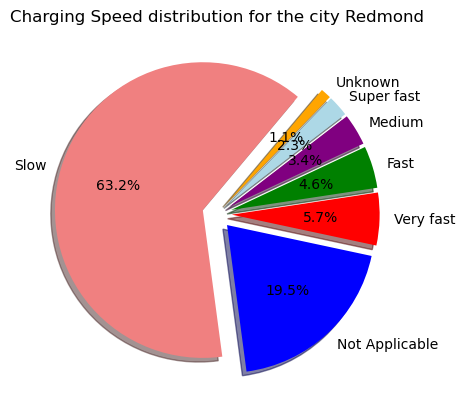

In [15]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Super Fast', 'Very Fast', 'Fast', 'Medium', 'Slow', 'Not Applicable']
}
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = city_redmond['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['lightcoral','blue', 'red', 'green', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed distribution for the city Redmond')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Redmond_Charging_Speed_Distribution.png")
plt.show()

In [16]:
# Plot Redmond chargers
map_plot_4 = city_redmond.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Redmond",
    hover_cols = "all"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [17]:
# Extracting charger data for Seattle, WA 

city_seattle = chargers_df[(chargers_df['near'] == 'Seattle, WA, USA')]
city_seattle


,name,near,Address,Lat,Lng,Charging Speed
342,EVgo Charging Station,"Seattle, WA, USA","1001 Broadway, Seattle, WA 98122",47.611511,-122.321083,Fast
343,ChargePoint Charging Station,"Seattle, WA, USA","338 Weller St Bridge, Seattle, WA 98134",47.597361,-122.330456,Fast
344,Shell Recharge Charging Station,"Seattle, WA, USA","56 Seneca St, Seattle, WA 98101",47.605599,-122.338900,Fast
345,Tesla Supercharger,"Seattle, WA, USA","601 Union St, Seattle, WA 98101",47.610026,-122.332075,Fast
346,Blink Charging Station,"Seattle, WA, USA","925 4th Ave, Seattle, WA 98104",47.605581,-122.333448,Slow
...,...,...,...,...,...,...
410,Blink Charging Station,"Seattle, WA, USA","1530 Belmont Ave, Seattle, WA 98122",47.614840,-122.324167,Slow
411,Blink Charging Station,"Seattle, WA, USA","Union Station, 505 5th Ave S, Seattle, WA 98104",47.597516,-122.327673,Slow
412,Loop Charging Station,"Seattle, WA, USA",US,47.617690,-122.330590,Slow
413,Blink Charging Station,"Seattle, WA, USA","1220 Howell St, Seattle, WA 98101",47.617493,-122.330225,Not Applicable


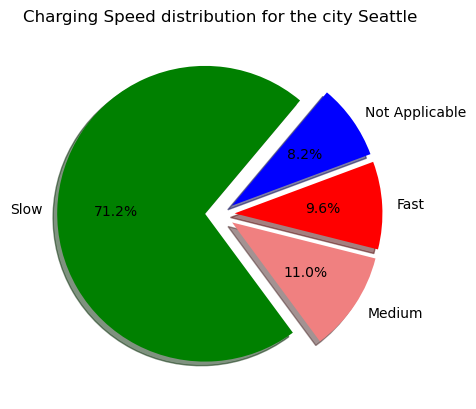

In [18]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Fast', 'Medium', 'Slow', 'Not Applicable']
}
explode = (0.1,0.1,0.1,0.1)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = city_seattle['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['green','lightcoral', 'red', 'blue', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed distribution for the city Seattle')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Seattle_Charging_Speed_Distribution.png")
plt.show()

In [19]:
# Plot Seattle chargers
map_plot_5 = city_seattle.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in seattle",
    hover_cols = "all"
)

# Display the map plot
map_plot_5


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [20]:
# Calulate Ratio Car: Charger

total_cars = np.array([5176, 5599, 5796, 8075, 26932])
                      
chargers = np.array([85, 89, 88, 73, 82])

Ratio = chargers / total_cars
Ratio

array([0.01642195, 0.0158957 , 0.01518288, 0.00904025, 0.00304471])

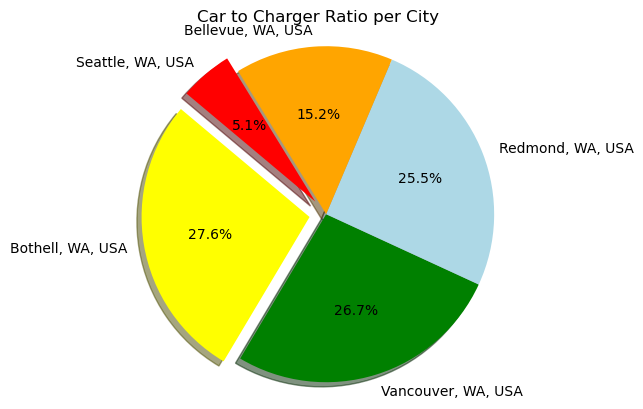

In [21]:
# Plot pie chart showing Car to Charger Ratio for Selected cities

cities = ['Bothell, WA, USA', 'Vancouver, WA, USA', 'Redmond, WA, USA', 'Bellevue, WA, USA', 'Seattle, WA, USA']
colors = ["yellow","green","lightblue","orange","red"]
explode = (0.1,0,0,0,0.1)

plt.pie(Ratio, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Car to Charger Ratio per City")

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Car_to_Charger_Ratio_per_city.png")
plt.show()

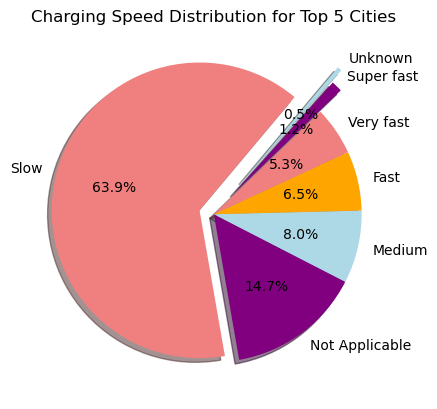

In [22]:
# Plot pie chart showing Charging Speed Distribution for Top 5 Cities

speed = {
    'Charging Speed': ['Super Fast', 'Very Fast', 'Fast', 'Medium', 'Slow', 'Unknown', 'Not Applicable']
}
explode = (0.1,0,0,0,0,0.2,0.3)

df = pd.DataFrame(speed)

# Count the occurrences of each charging speed
charging_speed_counts = chargers_df['Charging Speed'].value_counts()

# Create a pie chart
plt.pie(charging_speed_counts, explode=explode, labels=charging_speed_counts.index, colors=['lightcoral', 'purple', 'lightblue', 'orange'], autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('Charging Speed Distribution for Top 5 Cities')

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Charging_Speed_Distribution.png")
plt.show()